In [1]:
import numpy as np # Linear Alg
import pandas as pd # CSV file I/O & data processing

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings 
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
warnings.filterwarnings("ignore")
style.use('ggplot')

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)

from subprocess import check_output

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
data_dir = '../../input'
ripple_price = pd.read_csv('{}/ripple_price.csv'.format(data_dir), parse_dates=['Date'], index_col=0)
ripple_price.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [3]:
# first fifteen rows of ripple
ripple_price.head(15)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-09-05,0.205110,0.218674,0.190232,0.215189,"242,636,000","7,864,700,000"
2017-09-04,0.228781,0.228781,0.195960,0.204968,"239,613,000","8,772,340,000"
2017-09-03,0.227229,0.236443,0.218662,0.228811,"186,526,000","8,712,840,000"
2017-09-02,0.249348,0.249680,0.217774,0.226669,"329,928,000","9,560,940,000"
2017-09-01,0.255803,0.256162,0.243833,0.248479,"283,576,000","9,808,460,000"
2017-08-31,0.227558,0.261038,0.225907,0.255630,"432,574,000","8,725,450,000"
2017-08-30,0.218871,0.229805,0.217476,0.228006,"181,186,000","8,392,340,000"
2017-08-29,0.224026,0.225926,0.214867,0.218564,"269,770,000","8,590,000,000"
2017-08-28,0.203425,0.236260,0.196610,0.224508,"542,468,000","7,800,090,000"


In [4]:
# last fifteen rows of ripple
ripple_price.tail(15)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-08-18,0.005687,0.006263,0.005585,0.005617,-,"44,458,200"
2013-08-17,0.003138,0.005684,0.003138,0.005671,-,"24,533,400"
2013-08-16,0.003082,0.003162,0.002875,0.003134,-,"24,092,600"
2013-08-15,0.003788,0.003804,0.003067,0.003092,-,"29,615,000"
2013-08-14,0.004267,0.004267,0.003785,0.003788,-,"33,359,300"
2013-08-13,0.004463,0.004463,0.004171,0.004245,-,"34,893,700"
2013-08-12,0.004414,0.004520,0.004359,0.004449,-,"34,511,100"
2013-08-11,0.004314,0.004421,0.004300,0.004415,-,"33,725,000"
2013-08-10,0.004291,0.004366,0.004279,0.004314,-,"33,547,500"


In [5]:
rip_ohlc = ['Open', 'High', 'Low', 'Close']

for feat in rip_ohlc:
    print('---------------------------------------------')
    print('Statistics for Ripple {} values:'.format(feat))
    print(ripple_price[feat].describe())

---------------------------------------------
Statistics for Ripple Open values:
count    1494.000000
mean        0.027803
std         0.063325
min         0.002809
25%         0.005974
50%         0.007478
75%         0.012785
max         0.394931
Name: Open, dtype: float64
---------------------------------------------
Statistics for Ripple High values:
count    1494.000000
mean        0.029456
std         0.067624
min         0.003082
25%         0.006084
50%         0.007698
75%         0.013157
max         0.435170
Name: High, dtype: float64
---------------------------------------------
Statistics for Ripple Low values:
count    1494.000000
mean        0.026254
std         0.059060
min         0.002802
25%         0.005894
50%         0.007296
75%         0.011890
max         0.332222
Name: Low, dtype: float64
---------------------------------------------
Statistics for Ripple Close values:
count    1494.000000
mean        0.027934
std         0.063490
min         0.002810
25%     

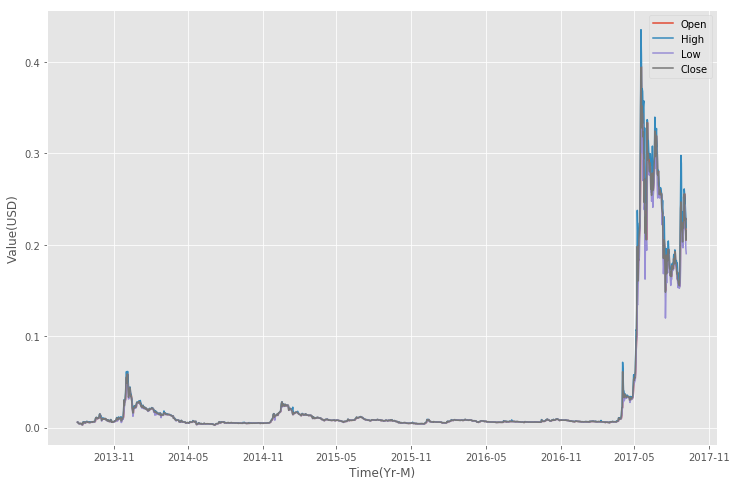

In [6]:
# plotting ripple's high, low, close, open values
for feat in rip_ohlc:
    plt.plot(ripple_price[feat], label=feat)

plt.xlabel('Time(Yr-M)')
plt.ylabel('Value(USD)')
plt.legend()
plt.show()

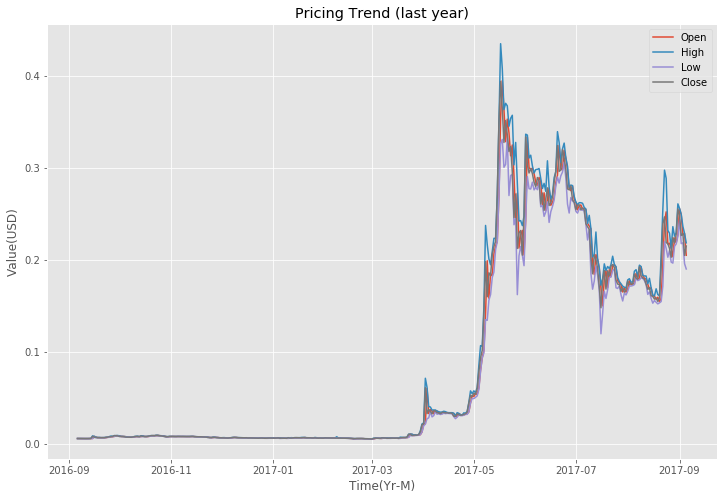

In [7]:
#ripple's more recent data
n_days = 365 # number of recent days

for feature in rip_ohlc:
    plt.plot(ripple_price[feature].iloc[:n_days], label=feature)

plt.title('Pricing Trend (last year)')
plt.xlabel('Time(Yr-M)')
plt.ylabel('Value(USD)')
plt.legend()
plt.show()